### Задание

#### Цель:

Изучить методы отбора признаков для эффективного обучения моделей машинного обучения.

#### Описание задания:

В домашнем задании нужно решить задачу классификации точек наиболее эффективно.
Для этого в работе необходимо применить различные методы по отбору признаков.
Отбор признаков предпочтительнее осуществлять основываясь на математическом аппарате,
поэтому данные для этого задания будут сгенерированы, чтобы избежать признаков с 
физическим смыслом.

#### Этапы работы: 

1. Сгенерируйте данные с помощью кода:
from sklearn.datasets import make_classification
x_data_generated, y_data_generated = make_classification(scale=1)

2. Постройте модель логистической регрессии и оцените среднюю точность. Для этого используйте следующий код:
cross_val_score(LogisticRegression(), x, y, scoring=‘accuracy’).mean()

3. Используйте статистические методы для отбора признаков:

a) Выберите признаки на основе матрицы корреляции.

b) Отсеките низковариативные признаки (VarianceThreshold).

c) Повторите п. 2 на отобранных признаках в п. 3a, п. 3b.

4. Осуществите отбор признаков на основе дисперсионного анализа:

a) Выберите 5 лучших признаков с помощью скоринговой функции для классификации f_classif (SelectKBest(f_classif, k=5)).

b) Повторите п. 2 на отобранных признаках.

5. Отбор с использованием моделей:

a) Реализуйте отбор признаков с помощью логистической регрессии. Отобранные признаки 
подайте далее на вход в саму логистическую регрессию (SelectFromModel).
Используйте L1 регуляризацию.

b) Реализуйте отбор признаков с помощью модели RandomForest и встроенного атрибута feature_impotance.

c) Повторите п. 2 на отобранных признаках в п. 5a, п. 5b.

6. Перебор признаков:

a) SequentialFeatureSelector.

b) Повторите п. 2 на отобранных признаках.

7. Сформулируйте выводы по проделанной работе:

a) Сделайте таблицу вида |способ выбора признаков|количество признаков|средняя точность модели|.


In [1]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import seaborn as sns
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mutual_info_score
from sklearn.linear_model import Lasso # линейная модель с L1-регуляризацией
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import NeighborhoodComponentsAnalysis

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import RFE
from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import SVR

from sklearn.inspection import permutation_importance

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif

from sklearn.feature_selection import SelectPercentile

from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import SelectFromModel

from sklearn.feature_selection import SequentialFeatureSelector

#### 1)

In [2]:
X, y = x_data_generated, y_data_generated = make_classification(scale=1, random_state=1)

#### 2)

In [3]:
model = LogisticRegression(random_state=1)
model.fit(X, y)

LogisticRegression(random_state=1)

In [4]:
cvs = cross_val_score(LogisticRegression(), X, y, scoring='accuracy').mean()
cvs

0.9

#### 3)

In [5]:
df_X = pd.DataFrame(x_data_generated)  # преобразование признаков в датафрейм
df_y = pd.DataFrame(y_data_generated)  # преобразование признаков в датафрейм

In [6]:
list(df_X);

In [7]:
df_y.columns = ['target'] # переименование во избежание дублирования названия столбцов

In [8]:
df = pd.concat([df_X, df_y], axis = 1)  # добавление целевого признака

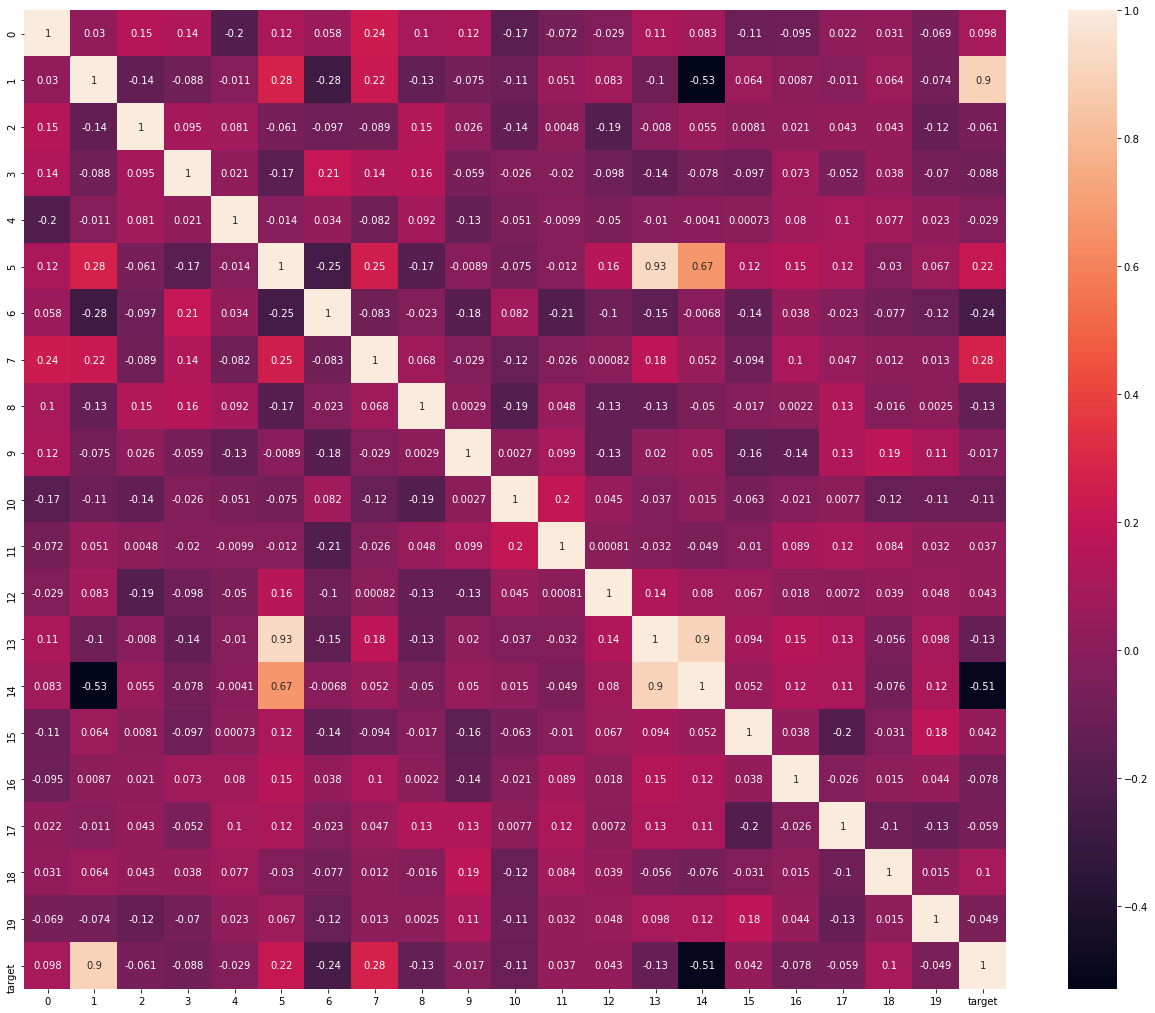

In [9]:
corr = df.corr()
plt.figure(figsize=(22,18))
sns.heatmap(corr,annot=True)
plt.show()

# 3. a) 
Отберу три признака 1, 14, задавшись пороговым значением корреляции > 0,5

In [10]:
X_corr =  df.iloc [:, [1, 14]]
X_corr.head(1)

,1,14
0,0.816958,-1.283933


In [11]:
model = LogisticRegression(random_state=1)
model.fit(X_corr, y)

LogisticRegression(random_state=1)

In [12]:
cvs_x_corr = cross_val_score(LogisticRegression(), X_corr, y, scoring='accuracy').mean()
cvs_x_corr

0.96

#### 3.б)

In [13]:
df_X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.053146,-0.062764,0.049450,0.210483,-0.097248,-0.060262,-0.020388,0.069076,-0.081307,0.035957,-0.147344,0.035219,0.270500,-0.052416,-0.013490,0.027092,0.016877,0.197783,-0.042690,-0.018577
std,1.302176,1.038809,1.152357,0.882755,0.981015,0.899996,0.953384,1.041781,0.990974,0.975737,1.078086,0.998601,1.029257,1.144764,1.083844,0.952015,0.986475,0.946056,1.007092,0.966921
min,-3.053764,-1.661536,-3.016032,-2.498213,-2.170711,-1.579213,-2.329041,-1.943922,-3.153357,-2.432509,-2.621012,-2.664126,-2.782534,-1.789624,-1.516493,-2.114164,-2.698362,-2.790996,-2.413503,-2.277298
25%,-0.830123,-0.970367,-0.500002,-0.481707,-0.702697,-0.746767,-0.523534,-0.705259,-0.682741,-0.714963,-0.734276,-0.543341,-0.443965,-1.069289,-1.138619,-0.625095,-0.535619,-0.430454,-0.835493,-0.778065
50%,0.025615,-0.426978,0.058174,0.225870,-0.149893,-0.202700,-0.004652,0.035744,-0.202844,-0.009490,-0.198935,0.295415,0.283328,-0.164593,-0.059412,-0.017485,0.058379,0.159954,0.006890,-0.099446
75%,0.976896,0.880810,0.841262,0.708763,0.593022,0.764931,0.609387,0.740141,0.482435,0.737476,0.485574,0.647263,0.940234,0.905881,0.864019,0.735543,0.541073,0.852596,0.737797,0.676636
max,3.321079,2.149570,3.432663,2.137828,2.230274,2.257082,2.505980,3.030857,2.428877,2.424307,2.917309,2.113824,2.827300,3.174625,2.783862,2.029997,2.711950,3.958603,2.390146,2.215843


In [14]:
selector = VarianceThreshold(threshold=1.0)
sel = selector.fit_transform(x_data_generated)
# VarianceThreshold удаляет все функции, дисперсия которых не соответствует
# некоторому порогу. По умолчанию он удаляет все признаки с нулевой дисперсией,
# то есть признаки, которые имеют одинаковое значение во всех выборках.

# Подбирал значение threshold, смотря на df_X.describe(), добился accuracy 0,94 (ниже). 

In [15]:
selector.get_support()

array([ True,  True,  True, False, False, False, False,  True, False,
       False,  True, False,  True,  True,  True, False, False, False,
        True, False])

In [16]:
sel_df  = pd.DataFrame(sel)

In [17]:
#  не разобрался, как сохранить имена выбранных признаков

sel_df.head(3) 

,0,1,2,3,4,5,6,7,8
0,0.606548,0.816958,1.051321,0.050317,-0.737290,0.778174,-1.124787,-1.283933,0.164665
1,-3.053764,0.921162,-1.458324,0.398598,0.479852,0.578464,-1.070208,-1.287740,-1.552699
2,0.606404,0.680645,1.021248,0.599213,2.293718,-1.019520,-1.204402,-1.285590,-0.830011


In [18]:
model = LogisticRegression(random_state=1)
model.fit(sel_df, y)

LogisticRegression(random_state=1)

In [19]:
cvs_var_th = cross_val_score(LogisticRegression(), sel_df, y, scoring='accuracy').mean()
cvs_var_th

0.9400000000000001

#### 4)

In [20]:
selector = SelectKBest(f_classif, k=5)
X_sel = selector.fit_transform(X, y)
X_sel.shape

(100, 5)

In [21]:
X_sel = pd.DataFrame(X_sel)

In [22]:
selector.get_support()

array([False,  True, False, False, False,  True,  True,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False])

In [23]:
model = LogisticRegression(random_state=1)
model.fit(X_sel, y)

LogisticRegression(random_state=1)

In [24]:
cvs_kBest = cross_val_score(LogisticRegression(), X_sel, y, scoring='accuracy').mean()
cvs_kBest

0.96

#### 5 a) SelectFromModel

In [25]:
lr = LogisticRegression(random_state=1)
lr.fit(X, y)

LogisticRegression(random_state=1)

In [26]:
selector = SelectFromModel(lr, prefit=False, max_features=6, threshold=-np.inf)
X_lr = selector.fit_transform(X, y)

In [27]:
selector.get_support()

array([ True,  True, False, False, False,  True, False,  True, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False])

In [28]:
cvs_sfm = cross_val_score(LogisticRegression(), X_lr, y, scoring='accuracy').mean()
cvs_sfm

0.95

In [29]:
X_lr = pd.DataFrame(X_lr)

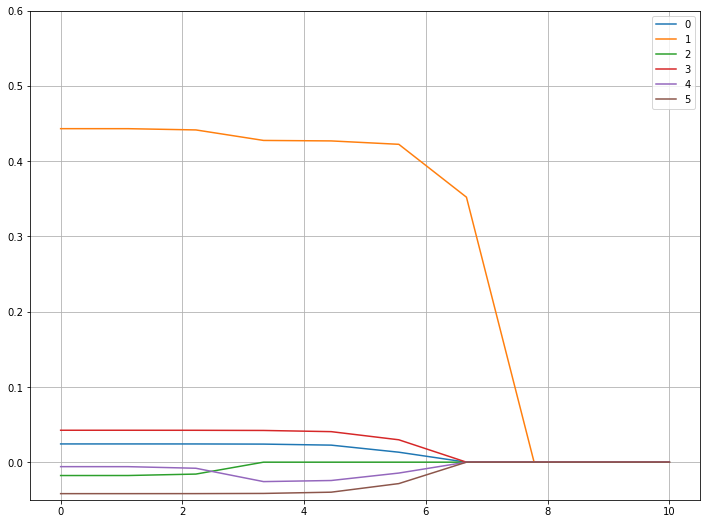

In [30]:
X_sc = StandardScaler().fit_transform(X_lr) # преобразование данных
lg_l,pred_l = [], []

list_l = list(2**np.linspace(-20,5,10))

# строим n-ое кол-во моделей Лассо, меняя коэффициент регуляризации, сохраняя модель и коэффициенты
for i in range(len(list_l)):
    m_l = Lasso(alpha=list_l[i]).fit(X_sc, y)
    lg_l.append(m_l)
    pred_l.append(m_l.coef_)

# рисуем отмасштабированные признаки на одном графике
plt.figure(figsize=(12,9))
x_l = np.linspace(0,len(pred_l),len(pred_l))
for i in np.vstack(pred_l).T:
    plt.plot(x_l,np.sign(i)*np.abs(i))
     
plt.ylim(-0.05,0.6)  
plt.legend(list(X_lr))      
plt.grid()

Признак '1' получился самым важным нового набора признаков из X_lr. Добавлю еще '3'

In [31]:
model = LogisticRegression(random_state=1)
model.fit(X_lr.iloc [:, [1,3]], y)

LogisticRegression(random_state=1)

In [32]:
cvs_sfm_lr = cross_val_score(LogisticRegression(), X_lr.iloc [:, [1,3]], y, scoring='accuracy').mean()
cvs_sfm_lr

0.96

#### 5 б)

In [33]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X, y)

RandomForestClassifier(random_state=1)

In [34]:
imps = pd.Series(rf.feature_importances_)
imps.sort_values()

# два самых значимых признака 1 и 14. То же самое, что и 'ручной' выбор с помощью матрицы корреляций

15    0.012107
9     0.012615
0     0.013131
17    0.014644
4     0.016340
12    0.016767
2     0.016985
18    0.017096
8     0.018286
3     0.018654
19    0.019757
11    0.019782
10    0.020275
16    0.024693
13    0.035602
7     0.037961
6     0.044824
5     0.075942
14    0.179569
1     0.384971
dtype: float64

In [35]:
model = LogisticRegression(random_state=1)
model.fit(df_X.iloc [:, [1,14]], y)

LogisticRegression(random_state=1)

In [36]:
cvs_rf = cross_val_score(LogisticRegression(), df_X.iloc [:, [1,14]], y, scoring='accuracy').mean()
cvs_rf

0.96

#### 6) SequentialFeatureSelector

In [37]:
sfs_forward = SequentialFeatureSelector(
    RandomForestClassifier(random_state=1), n_features_to_select=5, direction="forward"
)
sfs_forward.fit(X, y)

SequentialFeatureSelector(estimator=RandomForestClassifier(random_state=1),
                          n_features_to_select=5)

In [38]:
X_sfs = sfs_forward.transform(X)

In [39]:
X_sfs.shape

(100, 5)

In [40]:
X_sfs = pd.DataFrame(X_sfs)

In [41]:
model = LogisticRegression(random_state=1)
model.fit(X_sfs, y)

LogisticRegression(random_state=1)

In [42]:
cvs_sfs = cross_val_score(LogisticRegression(), X_sfs, y, scoring='accuracy').mean()
cvs_sfs

0.95

In [43]:
data = {'способ выбора признаков': ['LogisticRegression', 'Corr_matrix', 'VarianceThreshold',\
                                    'SelectKBest', 'SelectFromModel', 'LogisticRegression',\
                                    'RandomForestClassifier', 'SequentialFeatureSelector'],
        'количество признаков': [len(df_X.columns), len(X_corr.columns), len(sel_df.columns), len(X_sel.columns),\
                                 len(X_lr.columns), len(X_lr.iloc [:, [1,3]].columns),\
                                 len(X_lr.iloc [:, [1,3]].columns), len(X_sfs.columns)],
        'средняя точность модели': [cvs, cvs_x_corr, cvs_var_th, cvs_kBest, cvs_sfm,\
                                    cvs_sfm_lr, cvs_rf, cvs_sfs],}
df_ = pd.DataFrame(data)
df_


,способ выбора признаков,количество признаков,средняя точность модели
0,LogisticRegression,20,0.90
1,Corr_matrix,2,0.96
2,VarianceThreshold,9,0.94
3,SelectKBest,5,0.96
4,SelectFromModel,6,0.95
5,LogisticRegression,2,0.96
6,RandomForestClassifier,2,0.96
7,SequentialFeatureSelector,5,0.95


#### Вывод: 
На основании проделанной работы пришел к выводу, что на данном наборе данных снижение количества признаков положительно сказалось на качестве. 
Самый очевидный для человеческого восприятия метод анализа корреляционной матрицы дал высокий результат(возможно, справедливо не всегда). 
SequentialFeatureSelector показал достойный результат, хотя и довольно требователен к ресурсам машины.